In [2]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install nltk

In [20]:

import numpy as np 
import pandas as pd   
import nltk 
nltk.download('stopwords')  
from nltk.corpus import stopwords 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shobh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
reviews = pd.read_csv("Data/sentiment_analysis.csv")
reviews.head(10)

,class,text
0,Pos,films adapted from comic books have had plent...
1,Pos,every now and then a movie comes along from a...
2,Pos,you ve got mail works alot better than it des...
3,Pos,jaws is a rare film that grabs your atte...
4,Pos,moviemaking is a lot like being the general m...
5,Pos,on june 30 1960 a self taught idealisti...
6,Pos,apparently director tony kaye had a major b...
7,Pos,one of my colleagues was surprised when i tol...
8,Pos,after bloody clashes and independence won l...
9,Pos,the american action film has been slowly drow...


In [22]:
reviews.shape

(2000, 2)

# exploratory data analysis before model selection

In [23]:
%matplotlib inline
import seaborn 

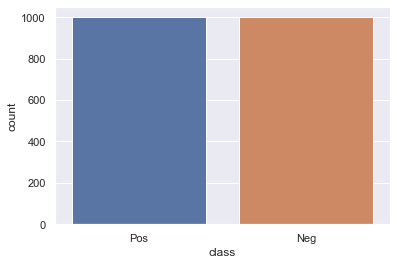

In [24]:
seaborn.set_theme(style = "darkgrid")
seaborn.countplot(x = 'class', data= reviews);

# Data preprocessing and data cleaning

In [25]:
X = reviews['text'].values # feature vectors 
y = reviews['class'].values # labels

# using different regular expressions for text preprocessing

In [30]:
import re # regular expression python library
processed_reviews = []

for reviews in range(0, len(X)):  
    # Removing  all the special characters
    processed_review = re.sub(r'\W', ' ', str(X[reviews]))
 
    # remove all single characters
    processed_review = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_review)
 
    # Remove single characters from the start
    processed_review = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_review) 
 
    # Substituting multiple spaces with single space
    processed_review = re.sub(r'\s+', ' ', processed_review, flags=re.I)
 
    # Removing prefixed 'b'
    processed_review = re.sub(r'^b\s+', ' ', processed_review)
 
    # Converting to Lowercase
    processed_review = processed_review.lower()
 
    processed_reviews.append(processed_review)

# Using TF-IDF vectorizer for feature extractor 

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer  
tfidfconverter = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.6, stop_words=stopwords.words('english'))
# the indivisual word sould be in atleast 5 documets and atmost 60% of the documents
X = tfidfconverter.fit_transform(processed_reviews).toarray()

# Dividing the data into training and testing set 

In [47]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
 

# importing the text classification model from sklearn 

In [48]:
from sklearn.naive_bayes import MultinomialNB
text_classifier = MultinomialNB()  
text_classifier.fit(X_train, y_train)

MultinomialNB()

In [53]:
# now passing the test set to make predictions
predictions = text_classifier.predict(X_test)

# Model evaluation and analysis

In [50]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
 
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print(accuracy_score(y_test, predictions))

[[82 19]
 [18 81]]
              precision    recall  f1-score   support

         Neg       0.82      0.81      0.82       101
         Pos       0.81      0.82      0.81        99

    accuracy                           0.81       200
   macro avg       0.81      0.82      0.81       200
weighted avg       0.82      0.81      0.82       200

0.815


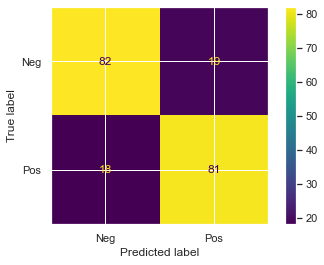

In [55]:
# plotting the data
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(text_classifier, X_test, y_test);

# plotting the precision-recall curve for two class problem

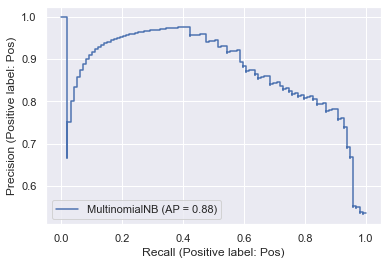

In [60]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(text_classifier, X_test, y_test)

So we saw that average precision is 88%. Now we can change the parameters and models_selection to see how accuracy, precision and recall will behave.